In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from feature_engine.encoding import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score

In [2]:
data = pd.read_pickle('../data/aus_weather_cln.pkl')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,1.4,9.5,0.073518,44.0,0.062725,...,71.0,22.0,1007.7,1007.1,8.0,4.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,0.8,0.3,0.060821,44.0,0.059164,...,44.0,25.0,1010.6,1007.8,7.0,0.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,6.2,4.7,0.067063,46.0,0.062725,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,3.8,3.0,0.052729,24.0,0.068892,...,45.0,16.0,1017.6,1012.8,4.0,3.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,3.6,11.6,0.073518,41.0,0.058243,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.0,10.8,0.068074,31.0,0.068892,...,51.0,24.0,1024.6,1020.3,8.0,7.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.4,5.6,0.048900,22.0,0.068892,...,56.0,21.0,1023.5,1019.1,4.0,7.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,3.2,0.0,0.068747,37.0,0.068892,...,53.0,24.0,1021.0,1016.8,4.0,0.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,1.6,6.6,0.069847,28.0,0.067737,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
data['RainToday'] = data['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)
data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)
data[['RainToday', 'RainTomorrow']]

,RainToday,RainTomorrow
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145455,0,0
145456,0,0
145457,0,0
145458,0,0


In [5]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Quarter
0,2008-12-01,Albury,13.4,22.900000,0.6,1.4,9.5,0.073518,44.0,0.062725,...,1007.1,8.0,4.0,16.9,21.8,0,0,2008,12,4
1,2008-12-02,Albury,7.4,25.100000,0.0,0.8,0.3,0.060821,44.0,0.059164,...,1007.8,7.0,0.0,17.2,24.3,0,0,2008,12,4
2,2008-12-03,Albury,12.9,25.700000,0.0,6.2,4.7,0.067063,46.0,0.062725,...,1008.7,0.0,2.0,21.0,23.2,0,0,2008,12,4
3,2008-12-04,Albury,9.2,28.000000,0.0,3.8,3.0,0.052729,24.0,0.068892,...,1012.8,4.0,3.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,Albury,17.5,32.300000,1.0,3.6,11.6,0.073518,41.0,0.058243,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.0,10.8,0.068074,31.0,0.068892,...,1020.3,8.0,7.0,10.1,22.4,0,0,2017,6,2
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.4,5.6,0.048900,22.0,0.068892,...,1019.1,4.0,7.0,10.9,24.5,0,0,2017,6,2
145457,2017-06-23,Uluru,5.4,26.900000,0.0,3.2,0.0,0.068747,37.0,0.068892,...,1016.8,4.0,0.0,12.5,26.1,0,0,2017,6,2
145458,2017-06-24,Uluru,7.8,27.000000,0.0,1.6,6.6,0.069847,28.0,0.067737,...,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,2


In [6]:
data.set_index('Date', inplace=True)
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Quarter
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.900000,0.6,1.4,9.5,0.073518,44.0,0.062725,0.062739,...,1007.1,8.0,4.0,16.9,21.8,0,0,2008,12,4
2008-12-02,Albury,7.4,25.100000,0.0,0.8,0.3,0.060821,44.0,0.059164,0.067469,...,1007.8,7.0,0.0,17.2,24.3,0,0,2008,12,4
2008-12-03,Albury,12.9,25.700000,0.0,6.2,4.7,0.067063,46.0,0.062725,0.067469,...,1008.7,0.0,2.0,21.0,23.2,0,0,2008,12,4
2008-12-04,Albury,9.2,28.000000,0.0,3.8,3.0,0.052729,24.0,0.068892,0.059989,...,1012.8,4.0,3.0,18.1,26.5,0,0,2008,12,4
2008-12-05,Albury,17.5,32.300000,1.0,3.6,11.6,0.073518,41.0,0.058243,0.060876,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.400000,0.0,5.0,10.8,0.068074,31.0,0.068892,0.055685,...,1020.3,8.0,7.0,10.1,22.4,0,0,2017,6,2
2017-06-22,Uluru,3.6,25.300000,0.0,5.4,5.6,0.048900,22.0,0.068892,0.062849,...,1019.1,4.0,7.0,10.9,24.5,0,0,2017,6,2
2017-06-23,Uluru,5.4,26.900000,0.0,3.2,0.0,0.068747,37.0,0.068892,0.062739,...,1016.8,4.0,0.0,12.5,26.1,0,0,2017,6,2


In [7]:
location_encoder = OrdinalEncoder(encoding_method='arbitrary',
                                  variables=['Location'])
location_encoder.fit(data)
# location_encoder.encoder_dict_
data = location_encoder.transform(data)
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Quarter
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,0,13.4,22.900000,0.6,1.4,9.5,0.073518,44.0,0.062725,0.062739,...,1007.1,8.0,4.0,16.9,21.8,0,0,2008,12,4
2008-12-02,0,7.4,25.100000,0.0,0.8,0.3,0.060821,44.0,0.059164,0.067469,...,1007.8,7.0,0.0,17.2,24.3,0,0,2008,12,4
2008-12-03,0,12.9,25.700000,0.0,6.2,4.7,0.067063,46.0,0.062725,0.067469,...,1008.7,0.0,2.0,21.0,23.2,0,0,2008,12,4
2008-12-04,0,9.2,28.000000,0.0,3.8,3.0,0.052729,24.0,0.068892,0.059989,...,1012.8,4.0,3.0,18.1,26.5,0,0,2008,12,4
2008-12-05,0,17.5,32.300000,1.0,3.6,11.6,0.073518,41.0,0.058243,0.060876,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,48,2.8,23.400000,0.0,5.0,10.8,0.068074,31.0,0.068892,0.055685,...,1020.3,8.0,7.0,10.1,22.4,0,0,2017,6,2
2017-06-22,48,3.6,25.300000,0.0,5.4,5.6,0.048900,22.0,0.068892,0.062849,...,1019.1,4.0,7.0,10.9,24.5,0,0,2017,6,2
2017-06-23,48,5.4,26.900000,0.0,3.2,0.0,0.068747,37.0,0.068892,0.062739,...,1016.8,4.0,0.0,12.5,26.1,0,0,2017,6,2


### regression feature selection

In [9]:
temp = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']
features = SelectKBest(score_func=f_regression, k=10)
selected_features = features.fit_transform(temp, y)
selected_features

array([[ 0.6,  9.5, 44. , ...,  8. ,  4. ,  0. ],
       [ 0. ,  0.3, 44. , ...,  7. ,  0. ,  0. ],
       [ 0. ,  4.7, 46. , ...,  0. ,  2. ,  0. ],
       ...,
       [ 0. ,  0. , 37. , ...,  4. ,  0. ,  0. ],
       [ 0. ,  6.6, 28. , ...,  3. ,  2. ,  0. ],
       [ 0. , 10.9, 54. , ...,  8. ,  8. ,  0. ]])

In [10]:
input_feature = ['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
                 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']
train_x, test_x, train_y, test_y = train_test_split(temp[input_feature], y, test_size=0.2, random_state=64)
train_x.shape, test_x.shape

((116368, 10), (29092, 10))

## CART implementation

- calculate GINI index

In [ ]:
def gini_score(groups, classes):
    score = 0.0
    n_instance = np.sum([len(group) for group in groups])
    for group in groups:
        class_values = 0.0

        if len(group) == 0:
            continue

        for cls in classes:
            class_values += np.power(np.sum(group.iloc[:, -1] == cls) / len(group), 2)

        # weighted score
        score += (len(group) / n_instance) * (1 - class_values)

    return score

- splitter function

In [ ]:
def splitter(index, column, dataset):
    left = dataset[dataset.iloc[:, column] < dataset.iloc[index, column]]
    right = dataset[dataset.iloc[:, column] >= dataset.iloc[index, column]]

    return left, right

- find best split point

In [ ]:
def find_split_point(dataset):
    classes = set(dataset.iloc[:, -1])
    features = list(dataset.columns)
    dataset = dataset.reset_index().drop('index', axis=1)
    t_index, t_value, t_score, t_groups = 99999, 99999, 99999, None

    for col in range(len(features) - 1):
        for index in dataset.index:
            groups = splitter(index, col, dataset)
            score = gini_score(groups, classes)

            if score < t_score:
                t_index, t_score, t_value, t_groups = col, score, dataset.iloc[index, col], groups

    return {"index": t_index,
            "value": t_value,
            "groups": t_groups}

- terminator function to stop growing tree when stopping criteria reached

In [ ]:
def to_terminal(group):
    outcome = list(group.iloc[:, -1])

    return max(outcome, key=outcome.count)

- crete tree by greedy recursive function

In [ ]:
def rec_split(node, depth, max_depth, minimum_batch):
    left, right = node['groups']
    del (node['groups'])

    # check for no split
    if left.empty or right.empty:
        node['left'] = node["right"] = to_terminal(left + right)
        return

        # check for max depth
    if depth >= max_depth:
        node['left'], node["right"] = to_terminal(left), to_terminal(right)
        return

    # process left branch
    if len(left) <= minimum_batch:
        node["left"] = to_terminal(left)
    else:
        node["left"] = find_split_point(left)
        rec_split(node["left"], depth + 1, max_depth, minimum_batch)

    # process right branch
    if len(right) <= minimum_batch:
        node["right"] = to_terminal(right)
    else:
        node["right"] = find_split_point(right)
        rec_split(node["right"], depth + 1, max_depth, minimum_batch)


def build_tree(train_data, max_depth, minimum_batch):
    root = find_split_point(train_data)
    rec_split(root, 1, max_depth, minimum_batch)

    return root

In [ ]:
dataset = pd.concat([train_x, train_y], axis=1)
tree = build_tree(dataset, 10, 500)
tree

In [ ]:
import json

with open('tree.json', 'w') as file:
    json.dump(tree, file)

## SciKit learn CART model

In [11]:
model = DecisionTreeClassifier(max_depth=5, min_samples_split=20)
model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_split=20)

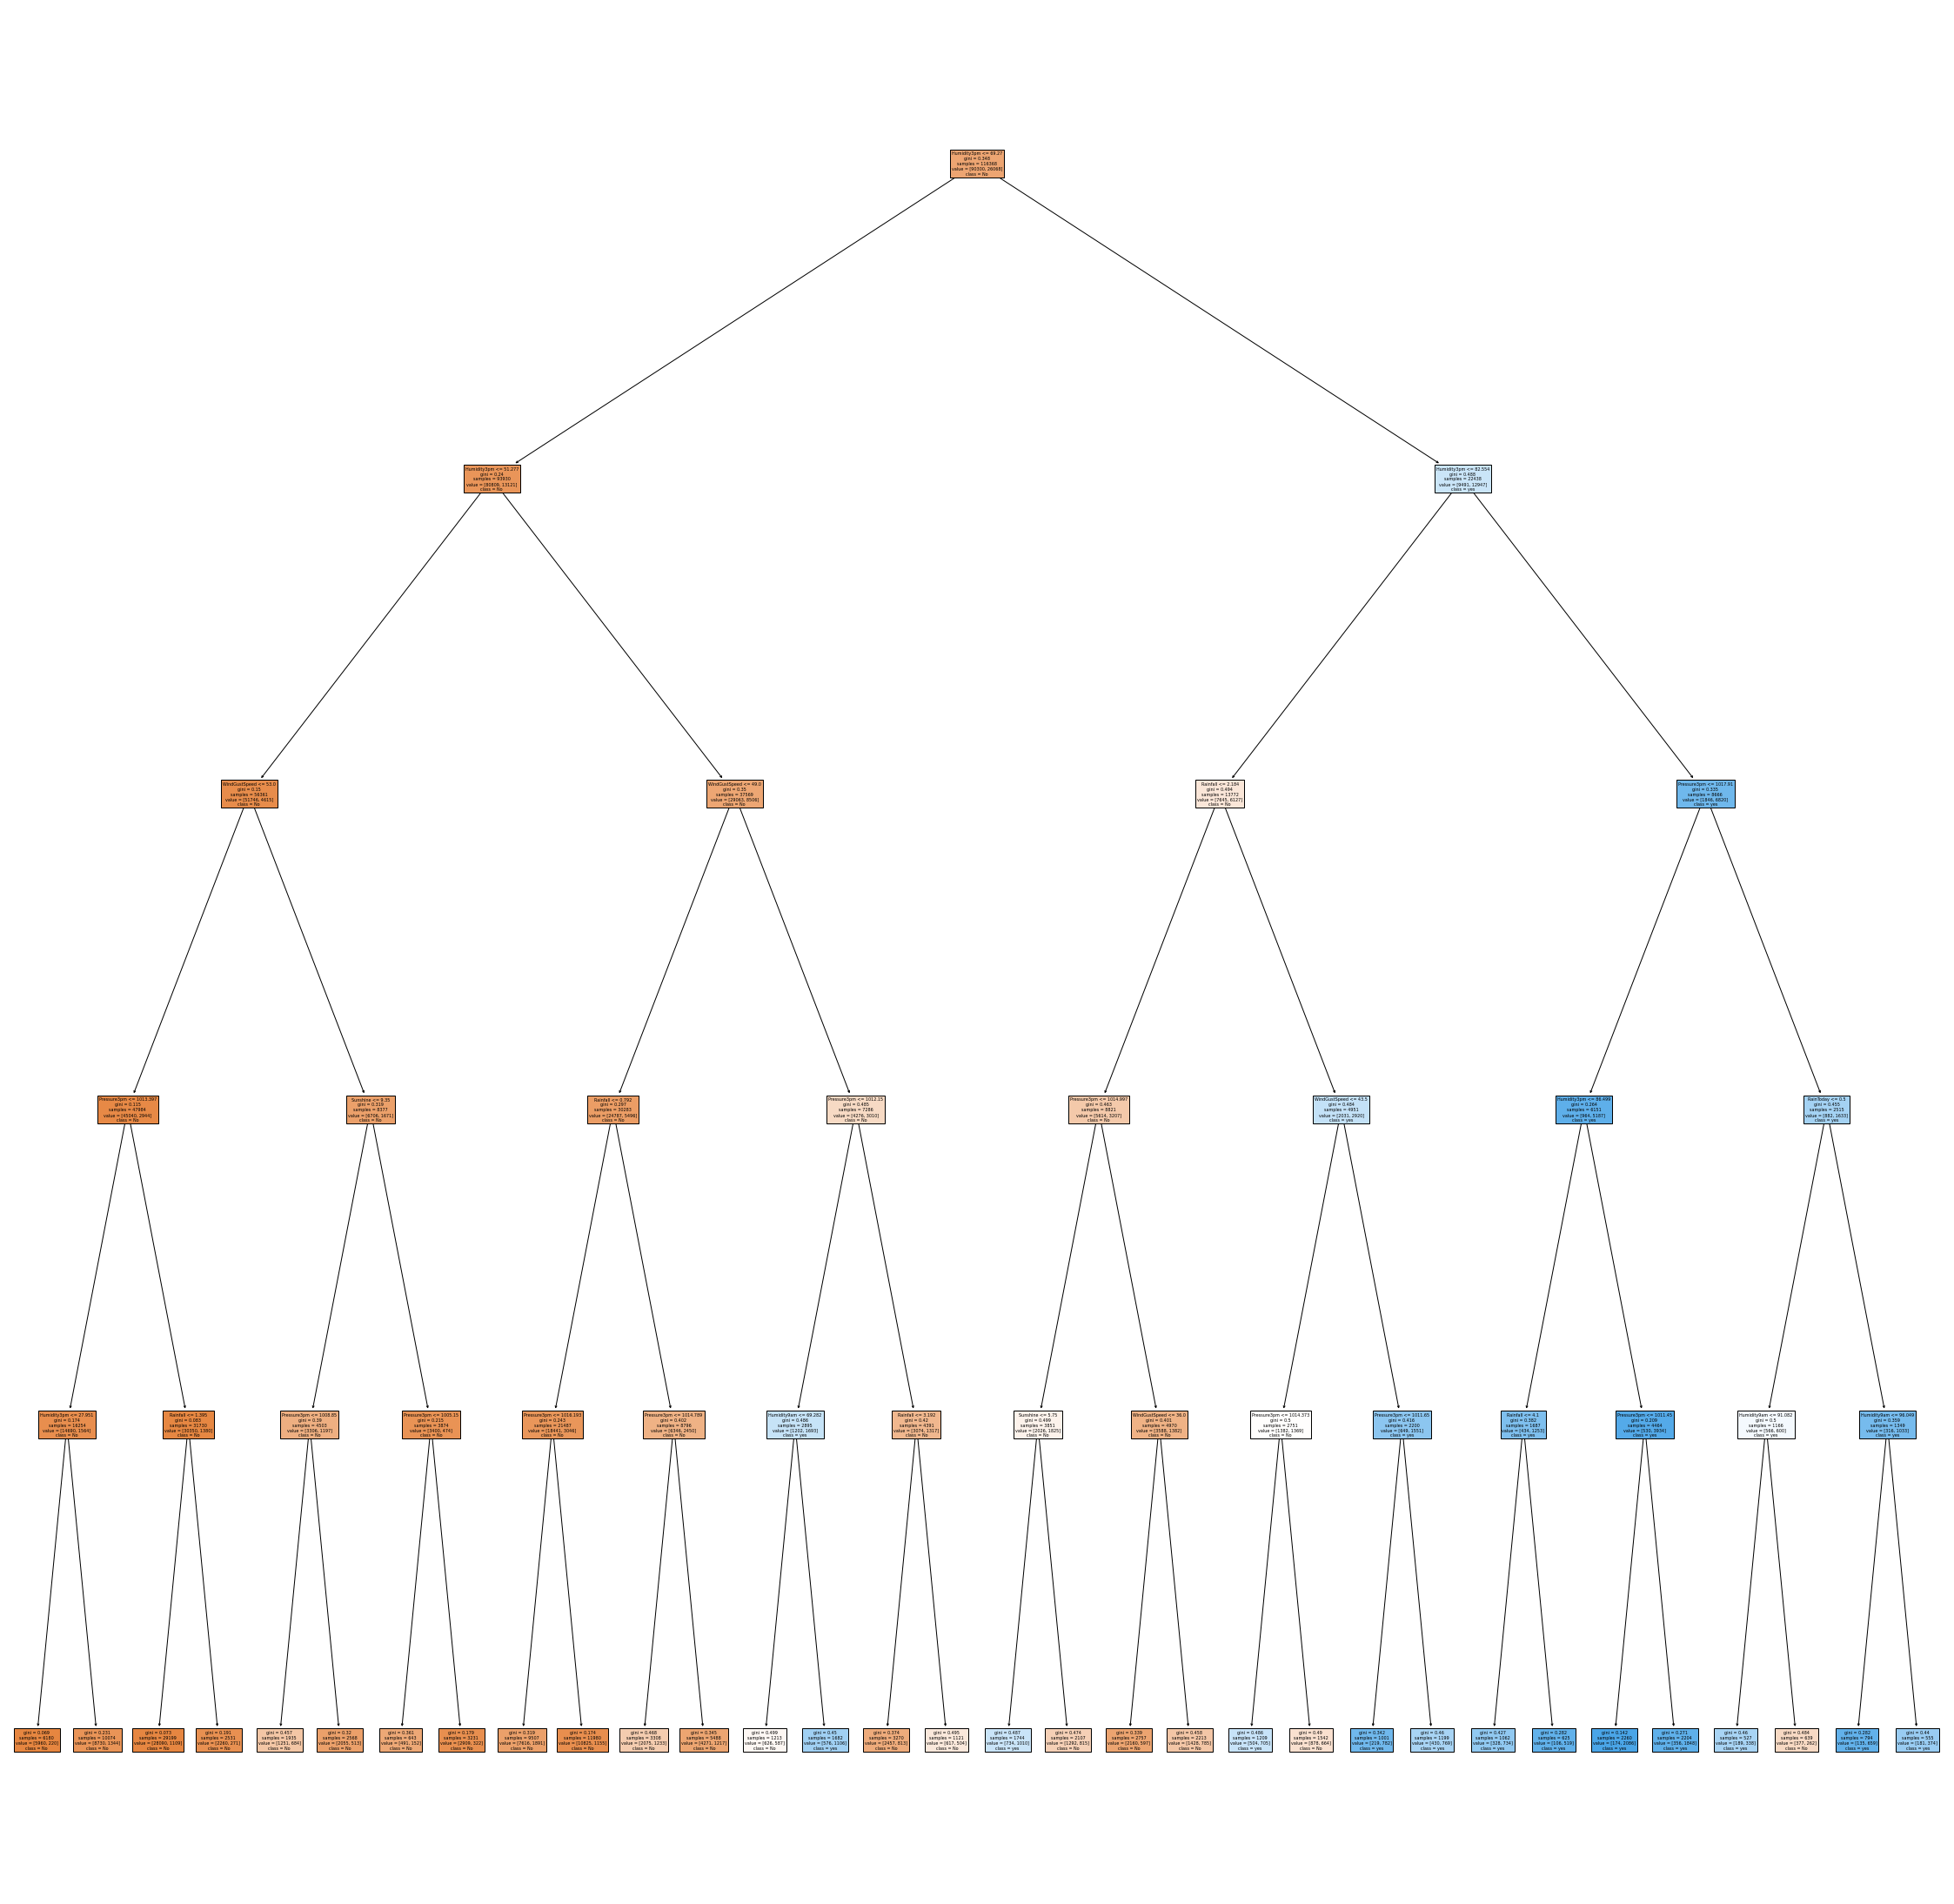

In [12]:
fig = plt.figure(figsize=(40, 40))
_ = plot_tree(model,
              feature_names=train_x.columns,
              class_names=['No', 'yes'],
              filled=True)
plt.savefig('../graphs/tree.jpg')
plt.show()

In [13]:
model.score(test_x, test_y) * 100

83.29093908978413

## Ensemble modeling

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:
base_model = DecisionTreeClassifier(max_depth=5, min_samples_split=20)
bagging_classifier = BaggingClassifier(base_estimator=base_model,
                                       n_estimators=50,
                                       max_samples=0.5,
                                       random_state=11,
                                       n_jobs=-1)
bagging_classifier.fit(train_x, train_y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        min_samples_split=20),
                  max_samples=0.5, n_estimators=50, n_jobs=-1, random_state=11)

In [20]:
bagging_classifier_pred_on_train = bagging_classifier.predict(train_x)
bagging_classifier_pred_on_test = bagging_classifier.predict(test_x)

print("bagging classifier:\n> Accuracy on training data = {:4f}\n> Accuracy on validation data = {:4f}".format(
    accuracy_score(y_true=train_y, y_pred=bagging_classifier_pred_on_train)*100,
    accuracy_score(y_true=test_y, y_pred=test_y)*100))

bagging classifier:
> Accuracy on training data = 83.883886
> Accuracy on validation data = 100.000000
